In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
import re
import numpy as np
import string as str
from datetime import datetime


In [15]:
debit = pd.read_csv('Checking1 (1).csv', names=['Date', 'Cost', 'Unknown', 'Unnamed', 'DebitCardUse'])


In [3]:
#credit = pd.read_csv('CreditCard3.csv', names=['Date', 'Cost', 'Unknown','Unnamed','CreditCardUse'])

In [4]:
debit=debit.drop(['Unknown', 'Unnamed'], axis=1)
#credit=credit.drop(['Unnamed','Unknown'], axis=1)

In [5]:
debit['Purchase']=0
pattern = re.compile(r'^PURCHASE AUTHORIZED*')
for i in debit['DebitCardUse']:
    if pattern.search(i):
        index = debit.loc[debit['DebitCardUse'] == i].index[0]
        debit.iloc[index, debit.columns.get_loc('Purchase')] = 1


In [6]:
debit['State']=debit['DebitCardUse'].str.extract('((?<=\s)[A-Z][A-Z](?=\s[A-Z]\d+))')
debit['City']=debit['DebitCardUse'].str.extract('((SAINT\s|SALT LAKE\s|LA\s)?[A-Z]*(?=\s[A-Z][A-Z]\s[A-Z]\d+))')[0]
debit['Stores']=debit['DebitCardUse'].str.extract('((?<=PURCHASE AUTHORIZED ON\s\d\d/\d\d\s)(#)?\w+.+?\w+\s\w+\s)')[0]

In [7]:
debit= debit.drop('DebitCardUse', axis=1)

In [8]:
debit.to_csv('Debit_Edited1')

In [186]:
#credit['State']=credit['CreditCardUse'].str.extract('([A-Z][A-Z]$)')
#credit['City']=credit['CreditCardUse'].str.extract('([A-Z]+(?=\s[A-Z][A-Z]$))')
#credit['Stores']=credit['CreditCardUse'].str.extract('(^\w+.\w+(\sPAYMENT)?)')[0]

In [188]:
#credit=credit.drop('CreditCardUse', axis=1)

In [190]:
#credit.to_csv('Credit_Edited')

In [10]:
merge1 = pd.read_csv('Debit_Edited')
merge2 = pd.read_csv('Debit_Edited1')

In [13]:
merge = merge1.append(merge2)

In [19]:
#merge= merge.drop('Unnamed: 0', axis=1)
merge=merge.drop_duplicates()

In [25]:
merge.to_csv('Debit_Full')

In [104]:
credit = pd.read_csv('Credit_Edited')
merge = pd.read_csv('Debit_Full', index_col = 0)

In [105]:
#credit = credit.drop('Unnamed: 0', axis=1)

In [106]:
credit['Credit_Purchase']=1
pattern = re.compile(r'PAYMENT*')
purch_index= []
for i in credit['Stores']:
    if pattern.search(i):
        purch_index.extend(credit.loc[credit['Stores'] == i].index)
purch_index = list(set(purch_index))
for i in purch_index:
    credit.iloc[i, credit.columns.get_loc('Credit_Purchase')] = 0

In [107]:
#credit.to_csv('Credit_Edited')
merge['Date']= pd.to_datetime(merge['Date'])
merge = merge.sort_values(by=['Date'])

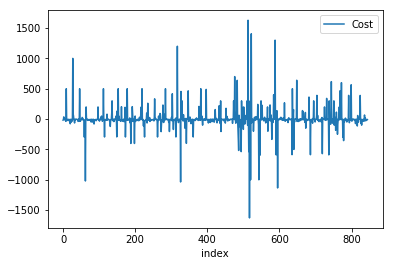

In [130]:
merge.reset_index().plot(x = 'index', y = 'Cost')

In [114]:
merge = merge.reset_index(drop=True)

In [132]:
merge['Cost'].min()

-1628.0

In [133]:
merge.to_csv('Debit_Full')

In [134]:
hi

NameError: name 'hi' is not defined